In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family ='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
# from statannot import add_stat_annotation
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
#파일을 불러옵니다.
p = pd.read_excel("../user/(반출금지) 미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [3]:
p

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


# 2번 매출 시각화

In [4]:
p['처리상태'].unique()

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [5]:
#2.a): 매출 시각화 월별, 연도별 매출 데이터 전처리: 월별, 연도별 매출(구매확정, 배송완료, 배송준비, 배송중, 결제완료)
a = p[p['처리상태'].isin(['구매확정', '배송완료', '배송중', '배송준비','결제완료'])]

#판매금액이 0원 초과인 금액의 데이터만 가져옵니다.
a2 = a[a['판매금액'] > 0]

#주문일자를 월,년의 파생변수로 정리합니다.
a2['월'] = a2['주문일자'].apply(lambda x: str(x)[5:7])
a2['년'] = a2['주문일자'].apply(lambda x: str(x)[:4])

# 주문일자를 월,년의 데이터로 변환후 주문일자 변수를 삭제합니다.
a2 = a2.drop(columns=['주문일자'])

C:\Users\user\AppData\Local\Temp\ipykernel_7756\3386464697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2['월'] = a2['주문일자'].apply(lambda x: str(x)[5:7])
C:\Users\user\AppData\Local\Temp\ipykernel_7756\3386464697.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2['년'] = a2['주문일자'].apply(lambda x: str(x)[:4])


In [6]:
a2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,처리상태,초도상품,제작문구 내역,할부기간,월,년
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,N,NaN,NaN,12,2019
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,N,NaN,NaN,12,2019
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,구매확정,N,NaN,NaN,12,2019
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,구매확정,N,NaN,NaN,12,2019
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,구매확정,N,NaN,NaN,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,결제완료,Y,NaN,NaN,11,2022
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,결제완료,Y,NaN,NaN,11,2022
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,배송준비,N,NaN,NaN,11,2022
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,배송완료,N,NaN,NaN,11,2022


### 2-a 월별 매출

In [7]:
#2.a-1): 월별 그래프
#월별 판매금액의 합계를 x1에 저장합니다.
x1 = a2.groupby('월')['판매금액'].sum().reset_index()

In [8]:
x1['판매금액'].sum()

8266485118

In [9]:
# 그래프의 한글 폰트를 사용합니다.
sns.set_style('whitegrid')
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family ='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


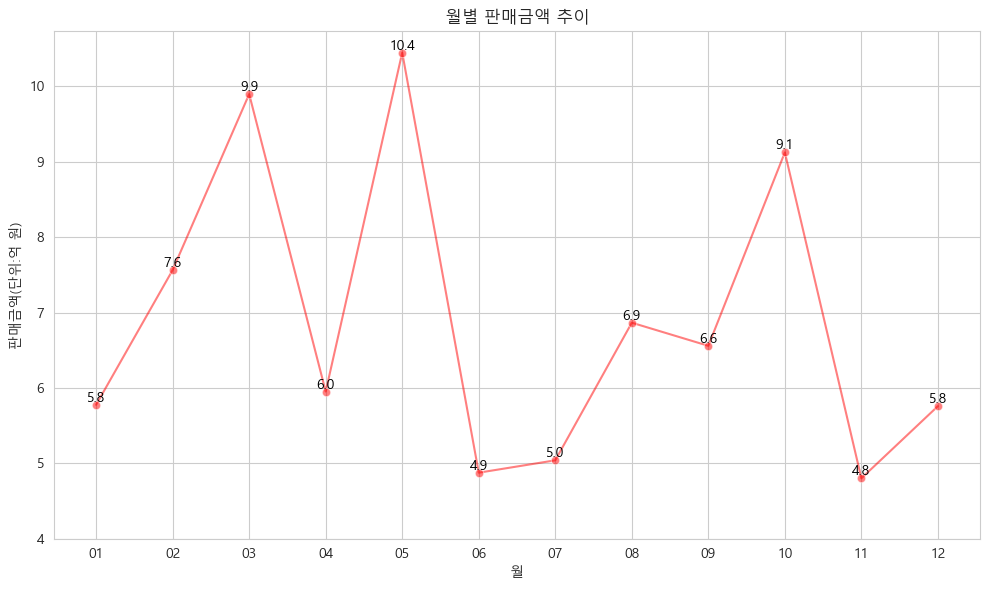

In [10]:
#꺽은선 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=x1, x='월', y='판매금액', marker='o', color='red', alpha=.5)

# 그래프의 점마다 판매금액을 표기합니다.(억원 단위로)
for i, (month, sales) in enumerate(zip(x1['월'], x1['판매금액'])):
    ax.text(i, sales, f'{sales/1e8:.1f}', color='black', ha='center', va='bottom')

# Y축 범위를 정의합니다.
plt.yticks([400000000,500000000,600000000,700000000,800000000,900000000,1000000000],
           [4,5,6,7,8,9,10])
# 제목을 정합니다.
plt.title('월별 판매금액 추이')

# X축, Y축을 정의합니다.
plt.xlabel('월')
plt.ylabel('판매금액(단위:억 원)')

# 그래프를 png로 저장하고,보여줍니다.
plt.tight_layout()
plt.savefig('a_1.png')
plt.show()



### 2-a 연도별 매출

In [11]:
#2.a-2: 년도별 막대그래프
#년도별 판매금액의 합계를 x2에 저장합니다.
x2 = a2.groupby('년')['판매금액'].sum().reset_index()

In [12]:
# 그래프의 한글 폰트를 사용합니다.
sns.set_style('whitegrid')
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family ='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

In [13]:
type(x2)

pandas.core.frame.DataFrame

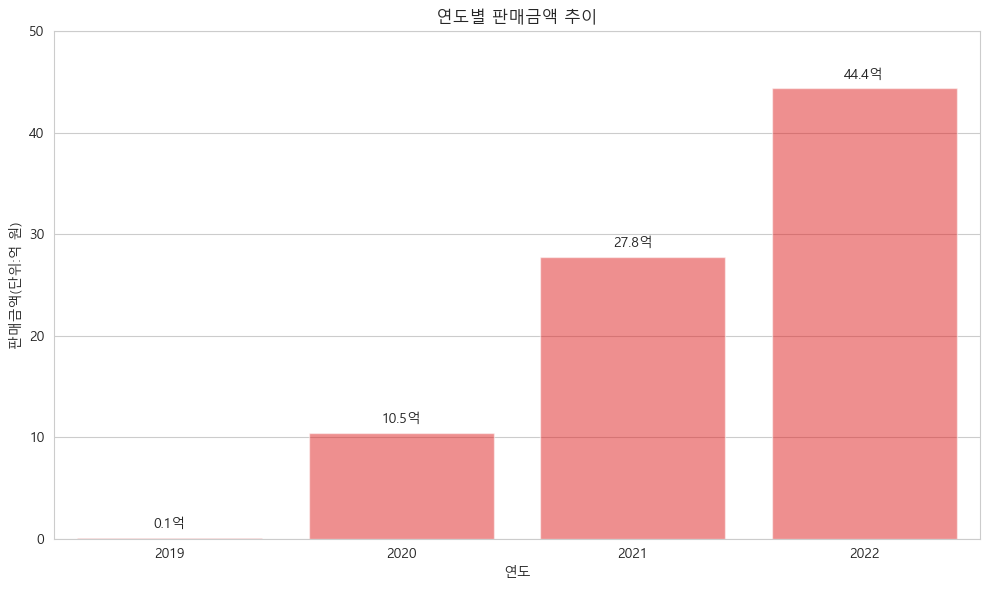

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=x2, x='년', y='판매금액', color='red', alpha=.5)

# 각각의 막대마다 판매금액을 표기합니다.
for i in ax.patches:
    height = i.get_height()
    ax.annotate(f'{height / 1e8:.1f}억',
                (i.get_x() + i.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points')

# Y축 범위를 정의합니다.
plt.yticks([0, 1000000000, 2000000000, 3000000000, 4000000000, 5000000000],
           ['0', '10', '20', '30', '40', '50'])

# 제목을 정합니다.
plt.title('연도별 판매금액 추이')

# X축, Y축을 정의합니다.
plt.xlabel('연도')
plt.ylabel('판매금액(단위:억 원)')

# 그래프를 png로 저장하고,보여줍니다.
plt.tight_layout()
plt.savefig('a_2.png')
plt.show()

#소수점 두번째 자리에서 반올림함. 2019년도의 판매금액은 500만원임

### 2-b 월별 순수익

In [15]:
#2.b:월별 순수익 데이터 전처리 -'처리상태' 변수중에서 '구매확정'열의 데이터만 가져옵니다.
b = p[p['처리상태'] == '구매확정']

#판매금액이 0원 초과인 금액의 데이터만 가져옵니다.
b2 = b[b['판매금액'] > 0]

# 주문일자를 월,년의 데이터로 변환후 주문일자 변수를 삭제합니다.
b2['월'] = b2['주문일자'].apply(lambda x: str(x)[5:7])
b2['년'] = b2['주문일자'].apply(lambda x: str(x)[:4])

C:\Users\user\AppData\Local\Temp\ipykernel_7756\3389265547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b2['월'] = b2['주문일자'].apply(lambda x: str(x)[5:7])
C:\Users\user\AppData\Local\Temp\ipykernel_7756\3389265547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b2['년'] = b2['주문일자'].apply(lambda x: str(x)[:4])


In [16]:
b2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,월,년
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,12,2019
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12,2019
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12,2019
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12,2019
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN,11,2022
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN,11,2022
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN,11,2022
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN,11,2022


In [17]:
c = b2[b2['할부기간'].isin(['6개월', '12개월', '18개월', '24개월'])]

In [18]:
c['할부기간'].unique()

array(['12개월', '24개월', '6개월', '18개월'], dtype=object)

In [19]:
c['년'].unique()

array(['2020', '2021', '2022'], dtype=object)

In [20]:
c #할부기간이 존재하는 데이터만 남겨둔 데이터 

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,월,년
25732,201020183220408,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 18:31:58,구매확정,N,NaN,12개월,10,2020
25738,201020195545933,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-20 19:55:24,구매확정,N,NaN,12개월,10,2020
25739,201020204237280,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 20:42:16,구매확정,N,NaN,12개월,10,2020
25774,201021044814392,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 04:47:52,구매확정,N,NaN,24개월,10,2020
25775,201021075232223,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 07:52:11,구매확정,N,NaN,24개월,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211390,221024125619745,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,5,1980000,정기결제,2022-10-24 12:54:00,구매확정,N,NaN,18개월,10,2022
212433,221025214536202,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,8,3168000,정기결제,2022-10-25 21:43:17,구매확정,N,NaN,18개월,10,2022
212630,221026132724396,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-26 13:25:05,구매확정,N,NaN,12개월,10,2022
213502,221027171416474,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-27 17:11:57,구매확정,N,NaN,12개월,10,2022


In [21]:
# b 데이터에서 할부기간이 없는 데이터만 가지고 옵니다.

hal_remove_data = b2[b2['할부기간'].isna() | (b2['할부기간'] == '1개월')]

#판매금액이 0원 초과인 금액의 데이터만 가져옵니다.
hal_remove_data = hal_remove_data[hal_remove_data['판매금액'] > 0]

# 주문일자를 월,년의 데이터로 변환후 주문일자 변수를 삭제합니다.
hal_remove_data['월'] = hal_remove_data['주문일자'].apply(lambda x: str(x)[5:7])
hal_remove_data['년'] = hal_remove_data['주문일자'].apply(lambda x: str(x)[:4])
hal_remove_data = hal_remove_data.drop(columns=['주문일자'])

hal_remove_data

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,처리상태,초도상품,제작문구 내역,할부기간,월,년
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,N,NaN,NaN,12,2019
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,N,NaN,NaN,12,2019
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,구매확정,N,NaN,NaN,12,2019
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,구매확정,N,NaN,NaN,12,2019
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,구매확정,N,NaN,NaN,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,구매확정,N,NaN,NaN,11,2022
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,구매확정,N,NaN,NaN,11,2022
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,구매확정,N,NaN,NaN,11,2022
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,구매확정,N,NaN,NaN,11,2022


In [22]:
# 월별 판매금액 데이터 만들기
monthly_sum = hal_remove_data.groupby('월')['판매금액'].sum().reset_index()

# monthly_sum 출력
monthly_sum

,월,판매금액
0,01,508339300
1,02,674075825
2,03,869008885
3,04,514857808
4,05,946621970
5,06,438490235
6,07,404218990
7,08,619231760
8,09,600857140
9,10,547605703


In [23]:
# 할부기간에서 '개월'제외하고, 정수로 만들기

c['할부기간'] = c['할부기간'].astype(str).str.replace('개월', '', regex=False)
c['할부기간'] = pd.to_numeric(c['할부기간'], errors='coerce').astype('Int64')

c

C:\Users\user\AppData\Local\Temp\ipykernel_7756\2737798161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['할부기간'] = c['할부기간'].astype(str).str.replace('개월', '', regex=False)
C:\Users\user\AppData\Local\Temp\ipykernel_7756\2737798161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['할부기간'] = pd.to_numeric(c['할부기간'], errors='coerce').astype('Int64')


,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,월,년
25732,201020183220408,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 18:31:58,구매확정,N,NaN,12,10,2020
25738,201020195545933,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-20 19:55:24,구매확정,N,NaN,12,10,2020
25739,201020204237280,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 20:42:16,구매확정,N,NaN,12,10,2020
25774,201021044814392,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 04:47:52,구매확정,N,NaN,24,10,2020
25775,201021075232223,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 07:52:11,구매확정,N,NaN,24,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211390,221024125619745,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,5,1980000,정기결제,2022-10-24 12:54:00,구매확정,N,NaN,18,10,2022
212433,221025214536202,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,8,3168000,정기결제,2022-10-25 21:43:17,구매확정,N,NaN,18,10,2022
212630,221026132724396,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-26 13:25:05,구매확정,N,NaN,12,10,2022
213502,221027171416474,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-27 17:11:57,구매확정,N,NaN,12,10,2022


In [24]:
# 판매금액 / 할부기간을 한 할부금액 칼럼 만들기
c['할부금액']= c['판매금액'] / c['할부기간']
c

C:\Users\user\AppData\Local\Temp\ipykernel_7756\17240343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['할부금액']= c['판매금액'] / c['할부기간']


,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,월,년,할부금액
25732,201020183220408,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 18:31:58,구매확정,N,NaN,12,10,2020,64000.0
25738,201020195545933,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-20 19:55:24,구매확정,N,NaN,12,10,2020,160000.0
25739,201020204237280,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,2,768000,후불,2020-10-20 20:42:16,구매확정,N,NaN,12,10,2020,64000.0
25774,201021044814392,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 04:47:52,구매확정,N,NaN,24,10,2020,80000.0
25775,201021075232223,지니 태블릿,[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제),삼성전자,5,1920000,후불,2020-10-21 07:52:11,구매확정,N,NaN,24,10,2020,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211390,221024125619745,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,5,1980000,정기결제,2022-10-24 12:54:00,구매확정,N,NaN,18,10,2022,110000.0
212433,221025214536202,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,8,3168000,정기결제,2022-10-25 21:43:17,구매확정,N,NaN,18,10,2022,176000.0
212630,221026132724396,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-26 13:25:05,구매확정,N,NaN,12,10,2022,33000.0
213502,221027171416474,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,1,396000,정기결제,2022-10-27 17:11:57,구매확정,N,NaN,12,10,2022,33000.0


### 할부금액을 고려한 월별 순수익 

In [25]:
#monthly_sum 데이터에 각각의 할부금액에 맞게 더하기
for index, row in c.iterrows(): # c 데이터의 각 행을 순회하면서 행 인덱스와 해당 행의 데이터를 순차적으로 반환
    start_month = int(row['월']) #시작하는 달 = '월' 칼럼
    installment_amount = row['할부금액'] # 할부 금액 = '할부금액' 칼럼
    period = row['할부기간'] # 기간 = '할부기간'칼

    for i in range(1, period + 1): # 1부터 할부기간까지의 숫자를 반복합니다.
        month_to_update = (start_month + i) % 12 # 시작하는 달에 각 i를 더하고 12로 나눈 나머지를 계산하여 각 달을 순환하도록 합니다.
        if month_to_update == 0:
            month_to_update = 12 # 12월을 나타내는 값이 0일 경우 12로 설정합니다.
        month_to_update_str = f'{month_to_update:02}' # 각 달을 두 자리 숫자로 변환합니다.
        monthly_sum.loc[monthly_sum['월'] == month_to_update_str, '판매금액'] += installment_amount
        # 월 열의 값과 일치하는 월로 선택하여 해당 월에 할부금액을 추가


# '판매금액' 열의 각 값에 대해 소수점 이하 자릿수를 제거
monthly_sum['판매금액'] = monthly_sum['판매금액'].apply(lambda x: '{:.0f}'.format(x))

monthly_sum

,월,판매금액
0,01,616908300
1,02,782402825
2,03,977181885
3,04,626110808
4,05,1056928970
5,06,552251235
6,07,514327990
7,08,729582760
8,09,711362140
9,10,655030703


In [26]:
monthly_sum['판매금액'] = monthly_sum['판매금액'].astype(int)

In [27]:
monthly_sum['판매금액'].sum()

8164569838

### 월별 순수익 판매금액 추이 그래프

In [28]:
b2_monthly_sum = b2.groupby('월')['판매금액'].sum().reset_index()
# monthly_sum 출력
b2_monthly_sum
b2_monthly_sum['판매금액'].sum()

8164569838

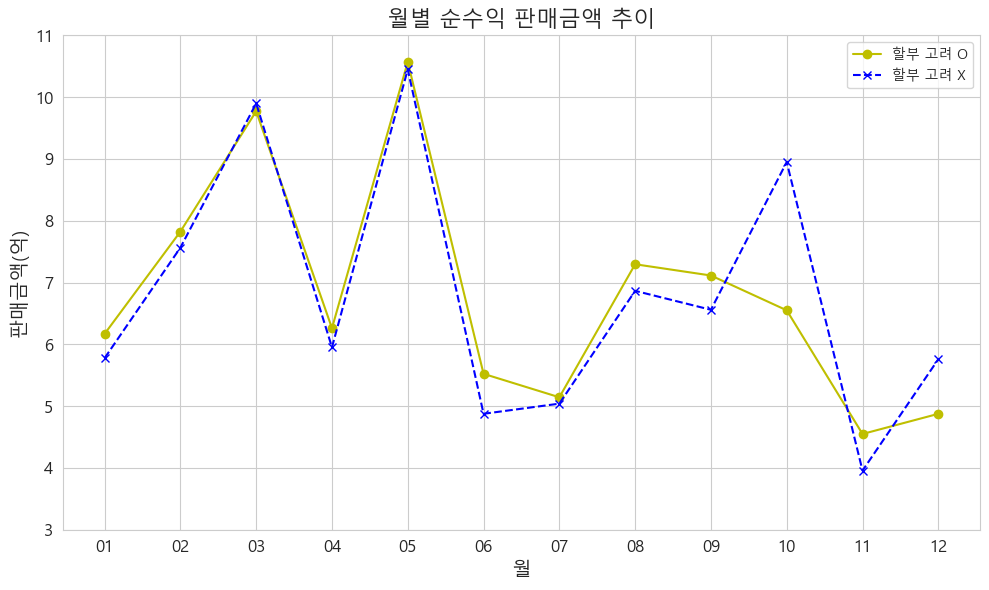

In [29]:
# 할부를 계산한 데이터 처리
months = monthly_sum['월']
sales_amounts = monthly_sum['판매금액'].astype(int)  # 판매금액을 숫자형으로 변환
# 할부 고려안한 데이터
months_b2 = b2_monthly_sum['월']
sales_amounts_b2 = b2_monthly_sum['판매금액'].astype(int)  # b2의 판매금액을 숫자형으로 변환
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(months, sales_amounts, marker='o', color='y', linestyle='-', label='할부 고려 O')
plt.plot(months_b2, sales_amounts_b2, marker='x', color='b', linestyle='--', label='할부 고려 X')
# y축 설정
plt.yticks([300000000, 400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000, 1100000000],
           [3, 4, 5, 6, 7, 8, 9, 10, 11])
# 그래프 꾸미기
plt.title('월별 순수익 판매금액 추이', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('판매금액(억)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
# 그래프 출력
plt.tight_layout()
plt.savefig('a_5.png')
plt.show()